In [6]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
#Load flower data
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/'\
            'curric-data-001-data-sets/master/iris/iris.data.csv'

petal_data = pd.read_csv(data_url, header = None, delimiter = ',')
petal_data.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'f_type']
petal_data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,f_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


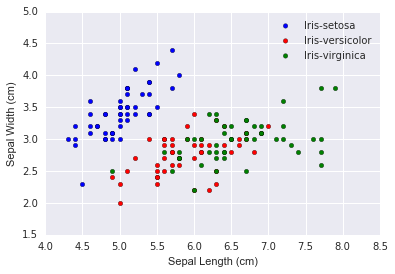

In [30]:
colors = ['b', 'r', 'g']

#Plot sepal length vs sepal width
plt.figure()
for i, flower in enumerate(petal_data['f_type'].astype('category').unique()):
    x = petal_data[petal_data['f_type'] == flower]['sepal_len']
    y = petal_data[petal_data['f_type'] == flower]['sepal_wid']
    plt.scatter(x, y, label = flower, c = colors[i]);
plt.xlabel('Sepal Length (cm)');
plt.ylabel('Sepal Width (cm)');
plt.legend();
plt.savefig('kNN_sepal_wid_vs_len', dpi = 100)

In [82]:
def knn(data, len_label, wid_label, f_type):
    #Function Input:
    #data = DataFrame of length, width and categorical data
    #len_label = String defining length data column
    #wid_label = String defining width data column
    #f_type = String defining categorical data column
    
    #Select random point and extract data
    pt = random.choice(data.index)
    len_point = data[len_label].loc[pt]
    wid_point = data[wid_label].loc[pt]
    
    nearest = pd.DataFrame(columns = ['distance', 'f_type'])
    nearest['distance'] = pow( 
                              pow(data[len_label] - len_point, 2) 
                            + pow(data[wid_label] - wid_point, 2)
                            , 0.5)
    nearest['f_type'] = data[f_type]
    
    nearest = nearest.sort_values(by = ['distance'])
    nearest = nearest.reset_index(drop = True)
    
    max_counts = (nearest['f_type'][1:11]).value_counts().max()
    counts = (nearest['f_type'][1:11]).value_counts()
    count = counts[counts == max_counts].index
    
    return(nearest, pt, count[0])

In [86]:
for i in range(10):
    print('Iteration %d' % i)
    near, pt, count = knn(petal_data, 
                          'sepal_len', 
                          'sepal_wid', 
                          'f_type')
    print('Majority class is %s' % count)
    print('Data point %d was selected' % pt)
    print('Data point class is %s\n' % petal_data['f_type'].loc[pt])

Iteration 0
Majority class is Iris-virginica
Data point 130 was selected
Data point class is Iris-virginica

Iteration 1
Majority class is Iris-virginica
Data point 118 was selected
Data point class is Iris-virginica

Iteration 2
Majority class is Iris-setosa
Data point 38 was selected
Data point class is Iris-setosa

Iteration 3
Majority class is Iris-versicolor
Data point 77 was selected
Data point class is Iris-versicolor

Iteration 4
Majority class is Iris-virginica
Data point 54 was selected
Data point class is Iris-versicolor

Iteration 5
Majority class is Iris-setosa
Data point 33 was selected
Data point class is Iris-setosa

Iteration 6
Majority class is Iris-setosa
Data point 106 was selected
Data point class is Iris-virginica

Iteration 7
Majority class is Iris-setosa
Data point 6 was selected
Data point class is Iris-setosa

Iteration 8
Majority class is Iris-virginica
Data point 105 was selected
Data point class is Iris-virginica

Iteration 9
Majority class is Iris-setosa
D

kNN is highly dependent on the distance method used to compare the
neighbors against the point under evaluation.  For example, if
all neighbors were used to judge the classification of a point.
All points would be classified as whichever type is most frequent
for the entire data set.  Therefore, kNN is sensitive to the
distance method used to include or exclude neighbors from a
classification.  To over simplify; too small of distance and 
kNN doesn't help infer classification of point and too large of 
distance and kNN over generalizes the data population.